In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('dog_horse.csv')
df.head()

,Unnamed: 0,height,weight,target,type
0,0,27.0,71.0,0.0,dog
1,1,27.0,92.0,0.0,dog
2,2,32.0,47.0,0.0,dog
3,3,30.0,90.0,0.0,dog
4,4,28.0,91.0,0.0,dog


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,Unnamed: 0,height,weight,target
count,200.000000,200.000000,200.000000,200.000000
mean,99.500000,47.480000,106.830000,0.500000
std,57.879185,18.415353,38.636836,0.501255
min,0.000000,25.000000,40.000000,0.000000
25%,49.750000,32.000000,80.000000,0.000000
50%,99.500000,43.000000,99.000000,0.500000
75%,149.250000,62.250000,141.000000,1.000000
max,199.000000,84.000000,179.000000,1.000000


In [5]:
df.isnull().sum()

Unnamed: 0    0
height        0
weight        0
target        0
type          0
dtype: int64

In [6]:
df.drop(["Unnamed: 0","type"], axis=1)

,height,weight,target
0,27.0,71.0,0.0
1,27.0,92.0,0.0
2,32.0,47.0,0.0
3,30.0,90.0,0.0
4,28.0,91.0,0.0
...,...,...,...
195,55.0,140.0,1.0
196,82.0,179.0,1.0
197,46.0,132.0,1.0
198,56.0,89.0,1.0


In [7]:
# Split into training and test sets
training, test = train_test_split(
    df, 
    train_size=0.8, # 80% of data to train
    test_size=0.2, # 20% of data to test
    random_state=42 # so that regardless of how many times I run the code I will have the "exact" points
)

In [8]:
training.head()

,Unnamed: 0,height,weight,target,type
79,79,33.0,89.0,0.0,dog
197,197,46.0,132.0,1.0,horse
38,38,34.0,55.0,0.0,dog
24,24,29.0,48.0,0.0,dog
122,122,51.0,174.0,1.0,horse


In [9]:
training.drop(["Unnamed: 0","type"],axis=1)

,height,weight,target
79,33.0,89.0,0.0
197,46.0,132.0,1.0
38,34.0,55.0,0.0
24,29.0,48.0,0.0
122,51.0,174.0,1.0
...,...,...,...
106,63.0,137.0,1.0
14,26.0,40.0,0.0
92,40.0,98.0,0.0
179,61.0,162.0,1.0


In [10]:
test.head()

,Unnamed: 0,height,weight,target,type
95,95,37.0,109.0,0.0,dog
15,15,34.0,55.0,0.0,dog
30,30,35.0,41.0,0.0,dog
158,158,72.0,116.0,1.0,horse
128,128,65.0,119.0,1.0,horse


In [11]:
test.drop(["Unnamed: 0","type"],axis=1)

,height,weight,target
95,37.0,109.0,0.0
15,34.0,55.0,0.0
30,35.0,41.0,0.0
158,72.0,116.0,1.0
128,65.0,119.0,1.0
115,59.0,164.0,1.0
69,32.0,69.0,0.0
170,74.0,155.0,1.0
174,48.0,150.0,1.0
45,25.0,60.0,0.0


In [12]:
# Create function to to find values

def calc_confuse(df):
    
    "Calculate all possible results of a confusion matrix"
    
    # Initialzing the arrays to zero 
    # These arrays will be used to save the values
    FP = np.zeros(len(df))
    TP = np.zeros(len(df))
    FN = np.zeros(len(df))
    TN = np.zeros(len(df))
    
    for x in range(len(df)):
        
        # positive --> weather is raining 
        # negative --> weather is not raining 
        
        # True Positive
        if (df["height"].iloc[x] <50) | (df["weight"].iloc[x] < 110):
            TP[x] = 1
        # True Negative
        elif (df["height"].iloc[x] > 50) | (df["weight"].iloc[x] > 110):
            TN[x] = 1
        # False Negative --> wrong prediction , prediction = not happening --> False
        elif (df["height"].iloc[x] > 50) & (df["weight"].iloc[x] < 110):
            FN[x] = 1
        # False Positive --> wrong prediction , prediction = happening --> True
        else:
            FP[x] = 1
    
    return FP, TP, FN, TN

In [13]:
# Extract results and create columns for each

# They are just a list 
w,x,y,z = calc_confuse(training)

# Creating columns in the dataframe from the lists 
training["FP"] = w
training["TP"] = x
training["FN"] = y
training["TN"] = z

# Look at 10 random rows to determin accuracy
training.sample(5)

<ipython-input-13-00abe7a8b057>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training["FP"] = w
<ipython-input-13-00abe7a8b057>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training["TP"] = x
<ipython-input-13-00abe7a8b057>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

,Unnamed: 0,height,weight,target,type,FP,TP,FN,TN
6,6,30.0,81.0,0.0,dog,0.0,1.0,0.0,0.0
188,188,73.0,98.0,1.0,horse,0.0,1.0,0.0,0.0
173,173,51.0,178.0,1.0,horse,0.0,0.0,0.0,1.0
62,62,25.0,44.0,0.0,dog,0.0,1.0,0.0,0.0
21,21,33.0,56.0,0.0,dog,0.0,1.0,0.0,0.0


In [14]:
# Extract results and create columns for each

# They are just a list 
w,x,y,z = calc_confuse(test)

# Creating columns in the dataframe from the lists 
test["FP"] = w
test["TP"] = x
test["FN"] = y
test["TN"] = z

# Look at 10 random rows to determin accuracy
test.sample(5)

<ipython-input-14-e6dfb7845144>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["FP"] = w
<ipython-input-14-e6dfb7845144>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["TP"] = x
<ipython-input-14-e6dfb7845144>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

,Unnamed: 0,height,weight,target,type,FP,TP,FN,TN
132,132,72.0,173.0,1.0,horse,0.0,0.0,0.0,1.0
16,16,27.0,92.0,0.0,dog,0.0,1.0,0.0,0.0
186,186,58.0,162.0,1.0,horse,0.0,0.0,0.0,1.0
56,56,28.0,93.0,0.0,dog,0.0,1.0,0.0,0.0
165,165,79.0,134.0,1.0,horse,0.0,0.0,0.0,1.0


In [15]:
training.drop(["Unnamed: 0","type"],axis=1)

,height,weight,target,FP,TP,FN,TN
79,33.0,89.0,0.0,0.0,1.0,0.0,0.0
197,46.0,132.0,1.0,0.0,1.0,0.0,0.0
38,34.0,55.0,0.0,0.0,1.0,0.0,0.0
24,29.0,48.0,0.0,0.0,1.0,0.0,0.0
122,51.0,174.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
106,63.0,137.0,1.0,0.0,0.0,0.0,1.0
14,26.0,40.0,0.0,0.0,1.0,0.0,0.0
92,40.0,98.0,0.0,0.0,1.0,0.0,0.0
179,61.0,162.0,1.0,0.0,0.0,0.0,1.0


In [16]:
test.drop(["Unnamed: 0","type"],axis=1)

,height,weight,target,FP,TP,FN,TN
95,37.0,109.0,0.0,0.0,1.0,0.0,0.0
15,34.0,55.0,0.0,0.0,1.0,0.0,0.0
30,35.0,41.0,0.0,0.0,1.0,0.0,0.0
158,72.0,116.0,1.0,0.0,0.0,0.0,1.0
128,65.0,119.0,1.0,0.0,0.0,0.0,1.0
115,59.0,164.0,1.0,0.0,0.0,0.0,1.0
69,32.0,69.0,0.0,0.0,1.0,0.0,0.0
170,74.0,155.0,1.0,0.0,0.0,0.0,1.0
174,48.0,150.0,1.0,0.0,1.0,0.0,0.0
45,25.0,60.0,0.0,0.0,1.0,0.0,0.0


In [17]:
# Calculate Accuracy
(sum(training["TP"]) + sum(training["TN"])) / len(training)

1.0

In [18]:
# Calculate Accuracy
(sum(test["TP"]) + sum(test["TN"])) / len(test)

1.0

In [19]:
# Calculate Precision 
sum(training["TP"])/ (sum(training["TP"]) + sum(training["FN"]))

1.0

In [20]:
# Calculate Precision 
sum(test["TP"])/ (sum(test["TP"]) + sum(test["FN"]))

1.0

In [21]:
# Calculate Recall
sum(training["TP"])/ (sum(training["TP"]) + sum(training["FP"]))

1.0

In [22]:
# Calculate Recall
sum(test["TP"])/ (sum(test["TP"]) + sum(test["FP"]))

1.0

In [23]:
training.shape

(160, 9)

In [24]:
training.head()

,Unnamed: 0,height,weight,target,type,FP,TP,FN,TN
79,79,33.0,89.0,0.0,dog,0.0,1.0,0.0,0.0
197,197,46.0,132.0,1.0,horse,0.0,1.0,0.0,0.0
38,38,34.0,55.0,0.0,dog,0.0,1.0,0.0,0.0
24,24,29.0,48.0,0.0,dog,0.0,1.0,0.0,0.0
122,122,51.0,174.0,1.0,horse,0.0,0.0,0.0,1.0


In [25]:
training.drop(["Unnamed: 0","type","FP","TP","FN","TN"],axis=1)

,height,weight,target
79,33.0,89.0,0.0
197,46.0,132.0,1.0
38,34.0,55.0,0.0
24,29.0,48.0,0.0
122,51.0,174.0,1.0
...,...,...,...
106,63.0,137.0,1.0
14,26.0,40.0,0.0
92,40.0,98.0,0.0
179,61.0,162.0,1.0


In [26]:
test.drop(["Unnamed: 0","type","FP","TP","FN","TN"],axis=1)

,height,weight,target
95,37.0,109.0,0.0
15,34.0,55.0,0.0
30,35.0,41.0,0.0
158,72.0,116.0,1.0
128,65.0,119.0,1.0
115,59.0,164.0,1.0
69,32.0,69.0,0.0
170,74.0,155.0,1.0
174,48.0,150.0,1.0
45,25.0,60.0,0.0


In [27]:
# Create an new dataframe with initialized values 

numrows = 157 

decision_tree_df = pd.DataFrame({'Height':[0.0]*numrows,'Weight':[0.0]*numrows,'Target':[0.0]*numrows})

decision_tree_df.head()

,Height,Weight,Target
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [28]:
# Sort columns for convenience 
seq = ['Height','Weight','Target']

# Create a simple 2 feature dataset to use for demo
decision_tree_df = decision_tree_df.reindex(columns=seq)

decision_tree_df.head()

,Height,Weight,Target
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [39]:
for i in range(0 , numrows):
    target = training.iloc[i,-1]
    height = training.iloc[(i-1),1]
    weight = training.iloc[(i-1),0]
    decision_tree_df.iat[i,2] = target
    decision_tree_df.iat[i,1] = weight
    decision_tree_df.iat[i,0] = height

decision_tree_df = decision_tree_df.dropna()

In [40]:
decision_tree_df.head()

,Height,Weight,Target
0,73.0,102.0,0.0
1,33.0,79.0,0.0
2,46.0,197.0,0.0
3,34.0,38.0,0.0
4,29.0,24.0,1.0


In [41]:
# Baseline 
decision_tree_df["Target"].value_counts(normalize=True)

0.0    0.719745
1.0    0.280255
Name: Target, dtype: float64

In [87]:
x = decision_tree_df[["Height","Weight"]].values

x

array([[ 73., 102.],
       [ 33.,  79.],
       [ 46., 197.],
       [ 34.,  38.],
       [ 29.,  24.],
       [ 51., 122.],
       [ 55., 195.],
       [ 28.,  29.],
       [ 27.,  19.],
       [ 62., 143.],
       [ 40.,  86.],
       [ 48., 114.],
       [ 51., 173.],
       [ 35.,   5.],
       [ 83., 126.],
       [ 43., 117.],
       [ 35.,  73.],
       [ 63., 140.],
       [ 44.,  98.],
       [ 59., 172.],
       [ 44.,  96.],
       [ 64., 169.],
       [ 41.,  97.],
       [ 35.,  31.],
       [ 35.,  12.],
       [ 27.,  35.],
       [ 42., 119.],
       [ 28.,  42.],
       [ 50., 189.],
       [ 45.,  90.],
       [ 48., 136.],
       [ 27.,  51.],
       [ 84., 127.],
       [ 54., 162.],
       [ 27.,  41.],
       [ 77., 118.],
       [ 71., 113.],
       [ 27.,  26.],
       [ 72., 139.],
       [ 49., 100.],
       [ 76., 111.],
       [ 32.,   2.],
       [ 32.,  77.],
       [ 31.,  46.],
       [ 41., 187.],
       [ 64., 191.],
       [ 38.,  85.],
       [ 62.,

In [89]:
# Modify the data to work with this model

x = decision_tree_df[["Height","Weight"]].values
y = decision_tree_df.Target.values

# Note: if you did not reshape your data this will result in a error in the classifier

#x = x.reshape(decision_tree_df.shape[0], 1)
y = y.reshape(decision_tree_df.shape[0], 1)

y

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

In [90]:
# in each split we should have feature set (these are the independent variables)
# and the class or the (dependant variable)

# Example --> y = x1 + x2 - 4x3 
# the feature set --> x1, x2, x3
# class/target set --> y 

# Create Validation Set

# Select target column
target = "target"

# feature set "X_train" and "X_test" --> PRCP, TMAX, TMIN
# target set --> Rain 

# Create training and validation sets
X_train, X_val, y_train, y_val,= train_test_split(
    # we are dropping the traget and the date
    training.drop([target, "type","Unnamed: 0"], axis=1), # Df with features
    
    training[target], # Df with labels
    
    train_size=0.8,
    test_size=0.2,
    random_state=42
)

In [91]:
lr = LinearRegression() # Create the model

lr.fit(X_train, y_train) # Fit the model

lr.score(X_val, y_val) # Score the model

0.7179219743246805

In [96]:
# Set max depth to 3 to make plotting the tree more visible

clf = DecisionTreeClassifier(criterion='entropy', max_depth=5).fit(x, y)



In [97]:
#we can calculate the accuarcy using score
score = clf.score(x,y)
print(score)

0.7388535031847133


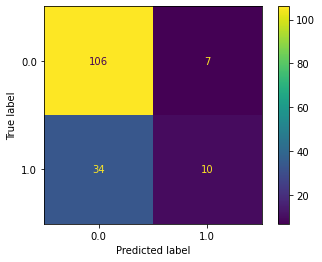

In [98]:
#we can also make a simple confusion matrix
plot_confusion_matrix(clf, x, y);

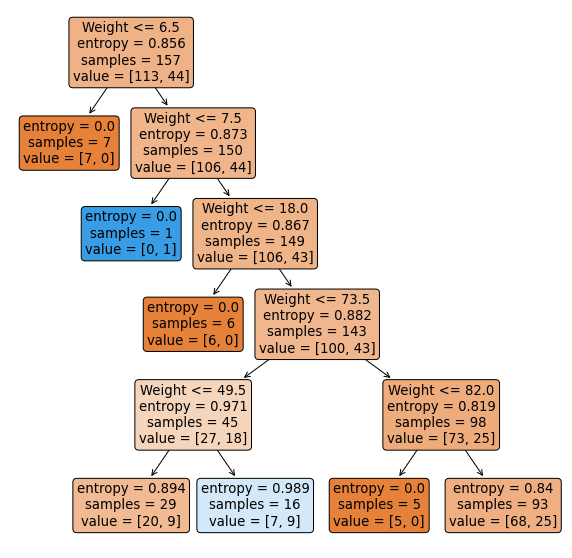

In [103]:
# Plot the tree
plt.figure(figsize=(10,10))
tree.plot_tree(
    clf, 
    filled=True,
    rounded=True,
    feature_names=["Height","Weight","Target"]
);